In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_signal/"
figs_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/CNN_plots/"

In [3]:
# plot globals:

axis_label_size = 30
title_size = 35
legend_text_size = 25
text_padding = 15
x_ticks_size = 25
y_ticks_size = 25

figure_size = (16,13)

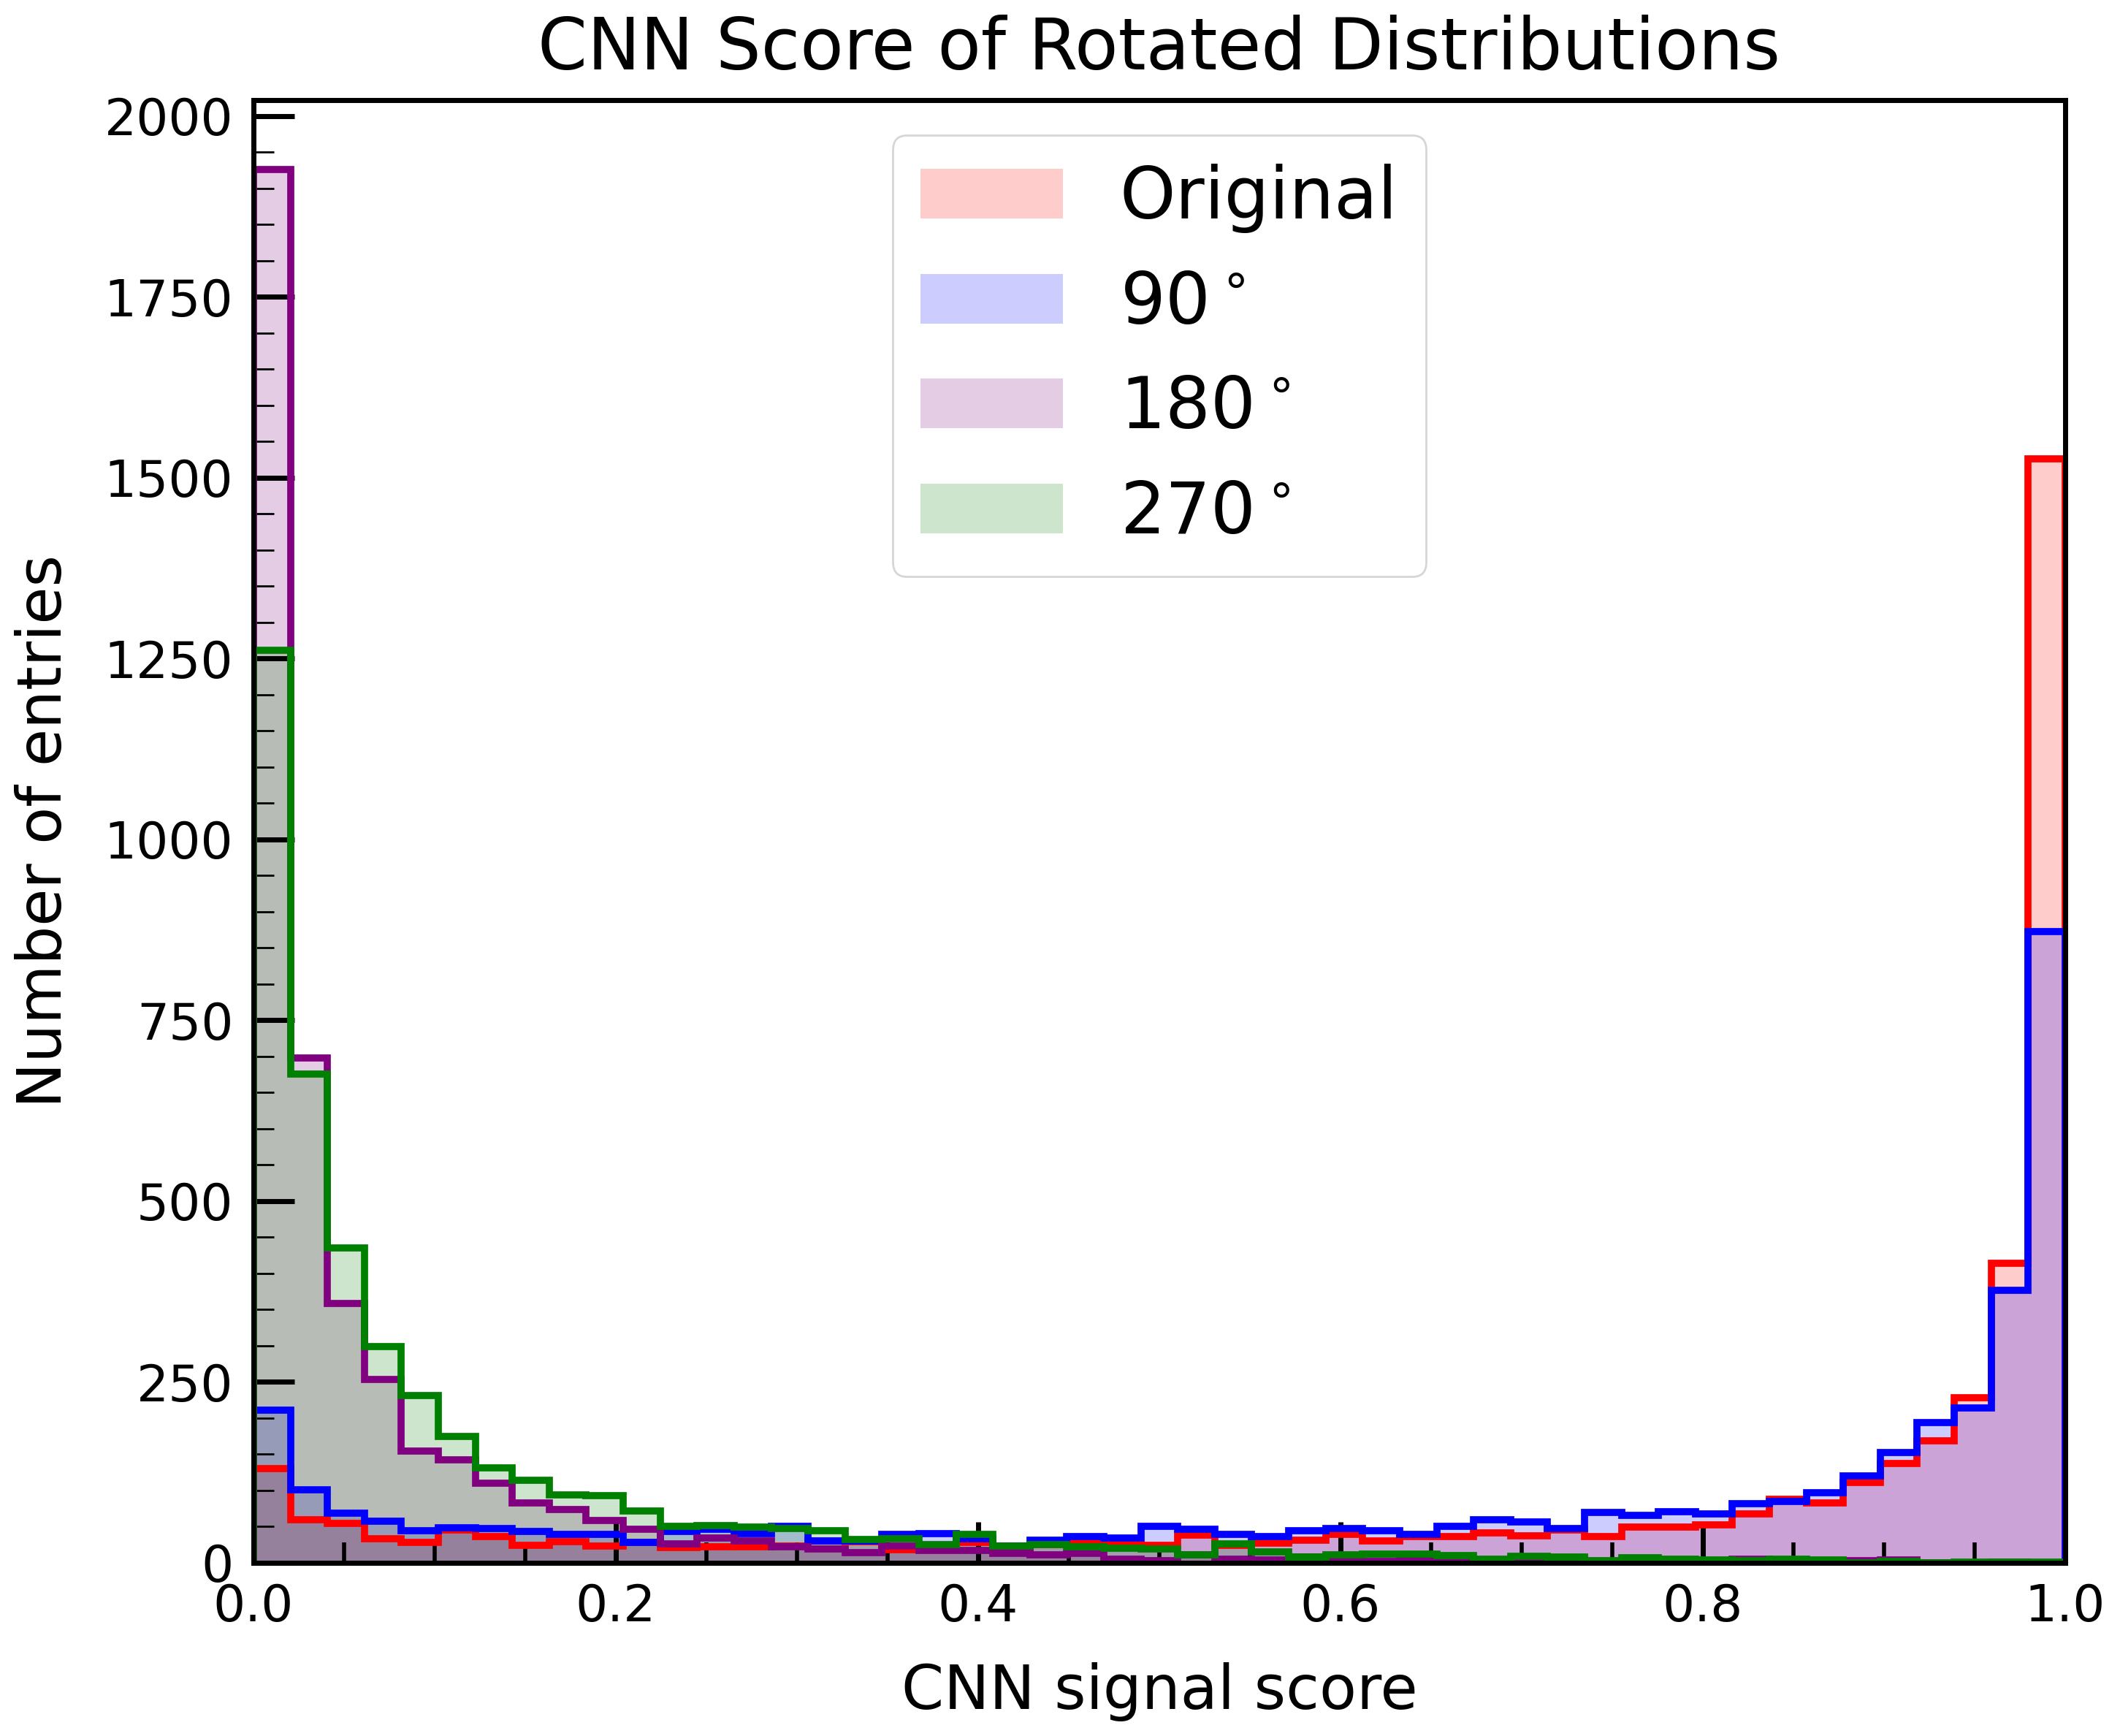

In [4]:
binning = np.linspace(0.,1.,50)
rotation_angles = [90, 180, 270]
colors = ["blue","purple", "green"]

fig = plt.figure(figsize=figure_size,dpi=200)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


# Open original distribution
df = pd.read_csv(base_dir + "run1_dt_ratio_0.6_0.05_pi0_CNN_scores_8441_steps.csv") 
df = df[df['signal_score'] >= 0.]
plt.hist(df['signal_score'],bins=binning,histtype='stepfilled',color='red',label='Original',alpha=0.2)
plt.hist(df['signal_score'],bins=binning,histtype='step',color='red',lw=3.5)

# Iterate and plot other rotated distributions

help_index = 0
for rotation in rotation_angles:
    df = pd.read_csv(base_dir + "run1_dt_ratio_0.6_0.05_pi0_CNN_scores_8441_steps_rotation_{}.csv".format(rotation)) 
    df = df[df['signal_score'] >= 0.]
    plt.hist(df['signal_score'],bins=binning,histtype='stepfilled',color=colors[help_index],label=r'${}^\circ$'.format(rotation),alpha=0.2)
    plt.hist(df['signal_score'],bins=binning,histtype='step',color=colors[help_index],lw=3.5)
    help_index+=1
    
    
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.legend(loc='upper center',fontsize=35)
#plt.yscale('log')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlim(0.,1.0)
plt.title(r"CNN Score of Rotated Distributions",fontsize=title_size,pad=text_padding)
plt.xlabel(r'CNN signal score',fontsize=axis_label_size,labelpad=text_padding)
plt.ylabel("Number of entries",fontsize=axis_label_size, labelpad=text_padding)
plt.savefig(figs_dir + "CNN_test_set_score_rotation_transformation.pdf",bbox_inches="tight")
plt.savefig(figs_dir + "CNN_test_set_score_rotation_transformation.png",bbox_inches="tight")
plt.show()